In [41]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')
from nltk.stem import WordNetLemmatizer #lemitization
from nltk.corpus import words
from tqdm import tqdm
tqdm.pandas()
import seaborn as sns
import matplotlib.pyplot as plt

from math import log2

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aless\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aless\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\aless\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [42]:
data = pd.read_csv('../../data/processed/processed_xy_augmented.csv')
change_in_pop = data['test_mean_clicks'].div(data['test_mean_impressions'])-data['clicks'].div(data['impressions'])


In [43]:
def emotional_score(data,emotion,length):
    lengths = data[length].apply(lambda x: log2(x+1))
    return data[emotion].div(lengths)


In [44]:
print(emotional_score(data,'Negative','token_word_count'))

0     1.477829
1     1.477829
2     1.477829
3     0.000000
4     0.000000
        ...   
95    0.000000
96    0.000000
97    0.000000
98    0.000000
99    0.000000
Length: 100, dtype: float64


In [45]:
def vizualize(data,emotion,length,y):
    escore= emotional_score(data,emotion,length)
    sns.regplot(x=escore,y=y)
    plt.savefig(f'../../data/visualizations/{emotion}-{length}.png')
    

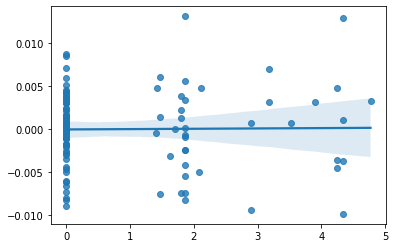

In [46]:
vizualize(data,'Negative','token_word_count',change_in_pop)